#  문제1.

Q. 매출 데이터에서 일일 평균 매출 계산하기  

-설명: 30일 동안의 쇼핑몰 매출 데이터를 배열로 제공할 때, 일일 평균 매출을 계산하세요.  
-힌트: np.mean() 함수를 사용하여 배열의 평균값을 계산합니다.  

In [2]:
import numpy as np
sales_data = np.array([2200, 2350, 2500, 2750, 3000, 3100, 2700, 2600, 2900, 3200,
                       3400, 3600, 3300, 3100, 2900, 2700, 2800, 2900, 3100, 3200,
                       3300, 3400, 3500, 3700, 3600, 3500, 3400, 3300, 3000, 3100])
sales_data

array([2200, 2350, 2500, 2750, 3000, 3100, 2700, 2600, 2900, 3200, 3400,
       3600, 3300, 3100, 2900, 2700, 2800, 2900, 3100, 3200, 3300, 3400,
       3500, 3700, 3600, 3500, 3400, 3300, 3000, 3100])

In [5]:
avg_sales=np.mean(sales_data)
print(avg_sales)
#행렬의 합/행렬의 요소수
avg_sales=sales_data.sum()/sales_data.size
print(avg_sales)

3070.0
3070.0


# 문제2. 
 - 매출 데이터에서 최대 매출일과 최소 매출일 찾기  
 - 설명: 매출 데이터에서 가장 높은 매출과 가장 낮은 매출을 기록한 날짜를 찾아보세요.  
 - 힌트: np.argmax(), np.argmin()을 사용하여 최대값, 최소값의 인덱스를 찾습니다.

In [7]:
sales_data.shape

(30,)

In [14]:
max_day,min_day=sales_data.argmax(), sales_data.argmin()
print(f'최대 매출일: {max_day+1}, 최소 매출일:{min_day+1}')

최대 매출일: 24, 최소 매출일:1


# 문제3.

- 7일 단위로 매출 합계 계산하기  
- 설명: 30일 매출 데이터를 7일 단위로 나누어 각 주차별 매출 합계를 계산하세요.  
- 힌트: 배열을 슬라이싱하거나 reshape()를 사용하여 배열을 변환합니다.

In [16]:
weeks=sales_data[:28].reshape(4,7)
weekly_sums=np.sum(weeks,axis=1)  #각 행의 합계

for i,total in enumerate(weekly_sums,1):
    print(f"{i}주차 매출 합계: {total}")
    
#weekly_data.sum(axis=0),요일별합계
#weekly_data.sum(axis=1), 주별 합계   
#남은 2일 계산
letfover=np.sum(sales_data[28:])
print("남은 날짜 매출 합계:",letfover)

1주차 매출 합계: 18600
2주차 매출 합계: 22100
3주차 매출 합계: 20900
4주차 매출 합계: 24400
남은 날짜 매출 합계: 6100


# 문제4.
- 매출 데이터에서 특정 조건에 맞는 매출 데이터를 필터랑하시오.  
- 설명: 매출이 3000 이상인 날들의 매출만 필터링하여 보여주세요.  
- 힌트: 배열에서 조건 필터링을 사용하는 방법을 익힙니다.

In [40]:
#filter()
high_sales = list(filter(lambda x: x>=3000, sales_data))
np.array(high_sales)

#filtered_sales=sales_data[sales_data>=3000]
#print("3000이상인 날들의 매출:")
#print(filtered_sales)

array([3000, 3100, 3200, 3400, 3600, 3300, 3100, 3100, 3200, 3300, 3400,
       3500, 3700, 3600, 3500, 3400, 3300, 3000, 3100])

# 문제5.

- 특정 범위 내 매출의 평균값 계산하기.  
- 설명: 매출이 2800에서 3500 사이인 날들의 평균 매출을 계산하세요.  
- 힌트: 조건 필터링 후 np.mean()을 사용하여 계산합니다.

In [41]:
#filtered_sales2=np.mean(sales_data[(sales_data>=2800) & (sales_data<=3500)])
#print(f' 매출이 2800과 3500사이인 날들의 평균 매출 계산:{filtered_sales2}')
#print("2800 이상 3500 이하 매출의 평균:", filtered_sales2)

cond = (sales_data>=2800)& (sales_data<=3500)
sales_data[cond].mean()

np.float64(3170.0)

# 주차별 평균계산

In [26]:
#매출의 중앙값
med=np.median(sales_data)
med

np.float64(3100.0)

In [30]:
#매출이 증가한 날, 감소한 날 카운트
df=np.diff(sales_data)
increase_days=np.sum(df>0)
decrease_days=np.sum(df<0)

print(f'매출이 증가한 날:{increase_days}일')
print(f'매출이 감소한 날:{decrease_days}일')

매출이 증가한 날:18일
매출이 감소한 날:11일


# 각 주차별로 가장 매출이 높았던 날 찾기

In [37]:


#1. 마지막 2일은 제외하고 주차 단위로 자르기
weeks=sales_data[:28].reshape(4,7)
#2. 각 주차별 최대값 인덱스 찾기
max_inweek=np.argmax(weeks,axis=1)
#3. 실제 날짜로 변환(0~6, 7~13)
act_day=max_inweek+np.arange(0,28,7)
#4. 결과 출력
for i,day in enumerate(act_day):
    print(f'{i+1}주차: 가장 매출이  높은 날은{day+1}일차 (매출:{sales_data[day]})')

1주차: 가장 매출이  높은 날은6일차 (매출:3100)
2주차: 가장 매출이  높은 날은12일차 (매출:3600)
3주차: 가장 매출이  높은 날은21일차 (매출:3300)
4주차: 가장 매출이  높은 날은24일차 (매출:3700)


[2657.14285714 3157.14285714 2985.71428571 3485.71428571]


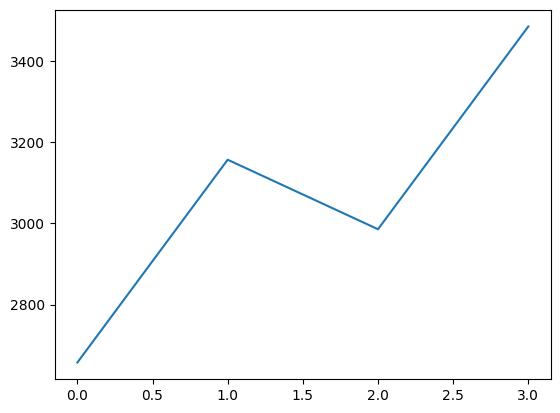

In [46]:
import matplotlib.pyplot as plt

w_mean = weeks.mean(axis=1)
print(w_mean)
plt.plot(w_mean)

[2657.14285714 3157.14285714 2985.71428571 3485.71428571]


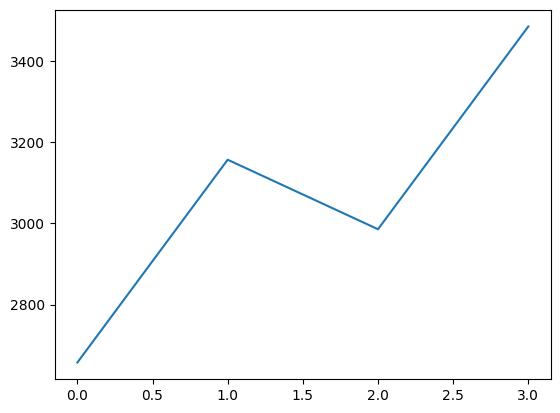

In [48]:
weekly_data_1 = weeks.copy().astype(float)
weekly_data_1[weekly_data_1==0] = np.nan

weekly_mean = np.nanmean(weekly_data_1, axis=1)
print(weekly_mean)
plt.plot(weekly_mean)

# 매출이 증가한 날, 감소한 날 카운트

In [50]:
sales_data

array([2200, 2350, 2500, 2750, 3000, 3100, 2700, 2600, 2900, 3200, 3400,
       3600, 3300, 3100, 2900, 2700, 2800, 2900, 3100, 3200, 3300, 3400,
       3500, 3700, 3600, 3500, 3400, 3300, 3000, 3100])

In [51]:
np.diff(sales_data)

array([ 150,  150,  250,  250,  100, -400, -100,  300,  300,  200,  200,
       -300, -200, -200, -200,  100,  100,  200,  100,  100,  100,  100,
        200, -100, -100, -100, -100, -300,  100])

# 각 주차별로 가장 매출이 높았던 날 찾기